<a href="https://colab.research.google.com/github/LukasPurbaW/Data-Analytics-Workflow/blob/main/Customer_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Dependencies

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

### Sheets

In [ ]:
# Transactions Sheets
sheet_url = "https://drive.google.com/file/d/1ziG7K6byv7BSzOUFLTHonIyOB68t3zZW/view?usp=sharing"
sheet_url ='https://drive.google.com/uc?id=' + sheet_url.split('/')[-2]
Transactions = pd.read_csv(sheet_url,encoding= 'unicode_escape')

Transactions["transaction_date"] = pd.to_datetime(Transactions["transaction_date"])

metrics = "transaction_date"
Transactions[metrics] = Transactions[metrics].dt.to_period('s')
Transactions.dtypes

Transactions.head(5)

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/datetimes.py:1146: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


,transaction_id,transaction_date,user_id,status,total_amount,payment_method_id
0,201635,2020-03-19 13:12:43,10671,Completed,2560000,1
1,302777,2020-12-12 08:29:15,10572,Completed,2560000,1
2,201475,2020-02-15 20:14:16,20893,Completed,3680000,1
3,202753,2020-07-10 07:38:09,20794,Completed,800000,1
4,202834,2020-08-02 06:58:15,20596,Completed,800000,1


In [ ]:
sheet_url = "https://drive.google.com/file/d/1W8X42g4xX75BS2nuQcrtxp57BslypbLt/view?usp=sharing"
sheet_url ='https://drive.google.com/uc?id=' + sheet_url.split('/')[-2]
Transaction_items = pd.read_csv(sheet_url,encoding= 'unicode_escape')
Transaction_items.head(5)

,transaction_item_id,transaction_id,product_id,qty
0,2010031,201003,10000,1
1,2010111,201011,10000,1
2,2010191,201019,10000,1
3,2010471,201047,10000,1
4,2010521,201052,10000,1


In [ ]:
sheet_url = "https://drive.google.com/file/d/1E3YSjwhkvQdWc239bR4WexAJKTg7GimY/view?usp=sharing"
sheet_url ='https://drive.google.com/uc?id=' + sheet_url.split('/')[-2]
Product = pd.read_csv(sheet_url,encoding= 'unicode_escape')
Product.head(5)

,product_id,product,product_category,price,merchant_id
0,10002,Jeans,1,200000,20007
1,10004,Dress,1,250000,20007
2,10005,Jacket,1,300000,20007
3,10006,Sweater,1,150000,20007
4,10007,Coat,1,300000,20007


In [ ]:
sheet_url = "https://drive.google.com/file/d/1ZURyZnxXClVbcDIeT-oCFaTSgHZ_JqW3/view?usp=sharing"
sheet_url ='https://drive.google.com/uc?id=' + sheet_url.split('/')[-2]
Product_category = pd.read_csv(sheet_url,encoding= 'unicode_escape')
Product_category.head(10)

,product_category_id,product_category
0,1,Clothing
1,2,Groceries
2,3,Stationery
3,4,Games
4,5,Health & Beauty
5,6,Mother & Care
6,7,Sport Equiment
7,8,Shoes
8,9,Electronics
9,10,Hobbies


In [ ]:
sheet_url = "https://drive.google.com/file/d/1WMAfx_n_7P2Msp-kgwh2GA1ppzGxoZMz/view?usp=sharing"
sheet_url ='https://drive.google.com/uc?id=' + sheet_url.split('/')[-2]
Payment_method = pd.read_csv(sheet_url,encoding= 'unicode_escape')

In [ ]:
Payment_method.head(5)

,payment_method_id,payment_method
0,1,credit card
1,2,debit card
2,3,transfer
3,4,e-wallet
4,5,paylater


In [ ]:
sheet_url = 'https://drive.google.com/file/d/1SwnRaj5AbJuk9ZsEzvCbnHFhCbnQGchP/view?usp=sharing'
sheet_url ='https://drive.google.com/uc?id=' + sheet_url.split('/')[-2]
Event = pd.read_csv(sheet_url,encoding= 'unicode_escape')

Event['timestamp_event'] = pd.to_datetime(Event['timestamp_event'])
Event['timestamp_event'] = Event['timestamp_event'].dt.to_period('s') #change to d or M for daily and monthly
Event.event_name = Event['event_name'].str.lower()
Event.head(5)

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/datetimes.py:1146: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


,event_id,event_name,timestamp_event,user_id,favorite_flag
0,157176,checkout,2020-12-21 21:32:01,10000,0.0
1,157177,completed,2020-12-21 21:32:08,10000,0.0
2,157167,view cart,2020-12-21 21:29:23,10000,0.0
3,215680,view cart,2021-12-14 12:49:37,10000,1.0
4,157165,add to cart,2020-12-21 21:29:00,10000,0.0


In [ ]:
sheet_url = 'https://drive.google.com/file/d/1ohnBHlenNPSp54QoH81K_Aslol8fhRtf/view?usp=sharing'
sheet_url ='https://drive.google.com/uc?id=' + sheet_url.split('/')[-2]
User = pd.read_csv(sheet_url,encoding= 'unicode_escape')
User

,user_id,regist_date,name,gender,province,city
0,10437,2019-12-10,Taswir Waskita,male,DKI Jakarta,Central Jakarta
1,20931,2019-12-11,Oliva Wahyuni,female,Jawa Barat,Bandung
2,10625,2019-12-12,Uda Jarwadi Manullang,male,DKI Jakarta,Central Jakarta
3,10650,2019-12-13,Among Waluyo M.Ak,male,Jawa Timur,surabaya
4,20706,2019-12-13,Sadina Uyainah,female,Jawa Barat,Bandung
...,...,...,...,...,...,...
1697,10017,2021-11-26,Latif Irawan S.Ked,male,Banten,Tangerang Selatan
1698,20121,2021-11-29,Zahra Iriana Nuraini S.Kom,female,Jawa Barat,Kota Bogor
1699,20055,2021-12-07,Zamira Elisa Rahmawati,female,Banten,Tangerang Selatan
1700,20366,2021-12-08,Syahrini Prastuti,female,Jawa Barat,Bandung


In [ ]:
sheet_url = 'https://drive.google.com/file/d/18RgfVuzC5GLgPRjRq4aYHTxVUO9vQBrj/view?usp=sharing'
sheet_url ='https://drive.google.com/uc?id=' + sheet_url.split('/')[-2]
Merchants = pd.read_csv(sheet_url,encoding= 'unicode_escape')
Merchants.head(5)

,merchant_id,merchant_name,province,city
0,20013,Wayscape,Banten,Kota Tangerang
1,20017,Ignition Point,Banten,Kota Tangerang
2,20022,Hilltop,Banten,Kota Tangerang
3,20023,Excel,Banten,Kota Tangerang
4,20042,Harum,Banten,Kota Tangerang


### Preprocessing for transactions data

In [ ]:
# Event
# User
# Transactions
# Transaction_items
# Payment_method
# Product
# Product_category
# Merchants

# Analisa Event- User
# Analisa Transactions full (semua tabel selain event) - User

In [ ]:
User.nunique()

user_id        1702
regist_date     446
name           1698
gender            2
province          5
city             16
dtype: int64

In [ ]:
# Analisa Transactions full (semua tabel selain event) - User
df = pd.merge(User, Transactions, how='left', on='user_id')
print(len(df))
df = pd.merge(df, Transaction_items, how='left', on='transaction_id')
print(len(df))
df = pd.merge(df, Product, how='left', on='product_id')
df = pd.merge(df, Product_category, how='left', left_on='product_category',right_on="product_category_id")
print(len(df))
df = pd.merge(df, Payment_method, how = "left",on="payment_method_id")

df = df.drop(["status","product","product_category_y","payment_method"], axis=1)
df

10583
15908
15908


,user_id,regist_date,name,gender,province,city,transaction_id,transaction_date,total_amount,payment_method_id,transaction_item_id,product_id,qty,product_category_x,price,merchant_id,product_category_id
0,10437,2019-12-10,Taswir Waskita,male,DKI Jakarta,Central Jakarta,202732.0,2020-07-04 19:33:32,720000.0,3.0,2027321.0,20016.0,1.0,7.0,720000.0,20031.0,7.0
1,10437,2019-12-10,Taswir Waskita,male,DKI Jakarta,Central Jakarta,201110.0,2020-01-01 08:18:00,1230000.0,3.0,2011101.0,20005.0,1.0,6.0,600000.0,20045.0,6.0
2,10437,2019-12-10,Taswir Waskita,male,DKI Jakarta,Central Jakarta,201110.0,2020-01-01 08:18:00,1230000.0,3.0,2011102.0,20020.0,1.0,8.0,630000.0,20018.0,8.0
3,10437,2019-12-10,Taswir Waskita,male,DKI Jakarta,Central Jakarta,201937.0,2020-05-17 14:37:57,1400000.0,3.0,2019372.0,20010.0,1.0,7.0,750000.0,20010.0,7.0
4,10437,2019-12-10,Taswir Waskita,male,DKI Jakarta,Central Jakarta,201937.0,2020-05-17 14:37:57,1400000.0,3.0,2019371.0,20014.0,1.0,7.0,650000.0,20033.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15903,10017,2021-11-26,Latif Irawan S.Ked,male,Banten,Tangerang Selatan,306748.0,2021-12-10 09:18:12,250000.0,4.0,3067481.0,10004.0,1.0,1.0,250000.0,20007.0,1.0
15904,20121,2021-11-29,Zahra Iriana Nuraini S.Kom,female,Jawa Barat,Kota Bogor,306762.0,2021-12-13 12:22:54,30000.0,2.0,3067621.0,10016.0,1.0,2.0,30000.0,20043.0,2.0
15905,20055,2021-12-07,Zamira Elisa Rahmawati,female,Banten,Tangerang Selatan,306811.0,2021-12-24 19:59:23,30000.0,5.0,3068111.0,10016.0,1.0,2.0,30000.0,20043.0,2.0
15906,20366,2021-12-08,Syahrini Prastuti,female,Jawa Barat,Bandung,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
non_nan_values = df.dropna()
df["transaction_date"] = df["transaction_date"].fillna(min(non_nan_values["transaction_date"]))

In [ ]:
columns = ['transaction_id','total_amount','product_category_id','payment_method_id']
for i in columns :
  df[i]= df[i].fillna(0)
  

In [ ]:
#df.groupby('user_id')['product_category_id'].agg(lambda x: pd.Series.mode(x).iat[0])
#<lambda is mode> choose one of the mode

#df_non_na = df.loc[df['status'] != np.NaN] #Gara-hara ini datanya 1500

df_group1 = df.groupby('user_id').agg({'transaction_id': 'count',
                                      'transaction_date':'max', 
                                     'total_amount': 'sum', 
                                     'product_category_id': lambda x: pd.Series.mode(x).iat[0], 
                                     'payment_method_id': lambda x: pd.Series.mode(x).iat[0],
                                     })

df_group1 = df_group1.reset_index()
df_group1['transaction_date'] = df_group1['transaction_date'].dt.to_timestamp('d')

print(max(df_group1['transaction_date']))
from datetime import date
today = date.today()

df_group1['Recension (days)'] = max(df_group1['transaction_date']) - df_group1['transaction_date']
df_group1 = df_group1.drop(columns="transaction_date")
df_group1['Recension (days)'] = pd.to_numeric(df_group1['Recension (days)'].dt.days, downcast='integer')

df_group1.rename(columns = {'transaction_id':'count transaction', 
                            'product_category_id':'favorite product category',
                            'payment_method_id':'favorite payment method'}, inplace = True)

print(len(df_group1))

2021-12-30 00:00:00
1702


In [ ]:
df_group1

,user_id,count transaction,total_amount,favorite product category,favorite payment method,Recension (days)
0,10000,2,190000.0,2.0,5.0,374
1,10001,4,710000.0,1.0,5.0,43
2,10002,7,1510000.0,1.0,5.0,7
3,10003,3,280000.0,1.0,5.0,142
4,10004,4,1010000.0,1.0,3.0,217
...,...,...,...,...,...,...
1697,20996,32,80238000.0,10.0,4.0,59
1698,20997,18,44464000.0,9.0,5.0,99
1699,20998,36,92520000.0,9.0,5.0,3
1700,20999,22,53246600.0,9.0,1.0,136


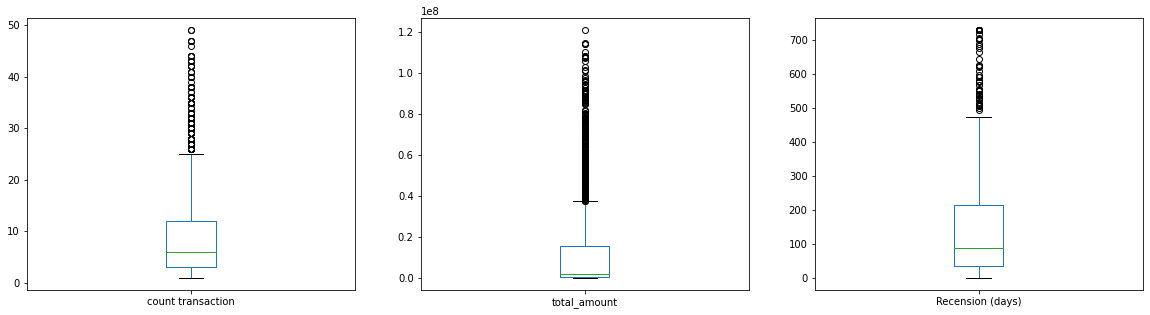

In [ ]:
cols = ['count transaction', 'total_amount','Recension (days)']

fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(20,5))
for i,el in enumerate(cols):
    a = df_group1.boxplot(el, ax=axes.flatten()[i],grid=False)
plt.show()

In [ ]:
cols = ['count transaction', 'total_amount','Recension (days)']
Q1 = df_group1[cols].quantile(0.25)
Q3 = df_group1[cols].quantile(0.75)
IQR = Q3 - Q1
df_group1_clean = df_group1[~((df_group1[cols] < (Q1 - 1.5 * IQR)) |(df_group1[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
df_group1_outlier = df_group1[((df_group1[cols] < (Q1 - 1.5 * IQR)) |(df_group1[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

print("total row clean data :", len(df_group1_clean))
print("total row outliers :", len(df_group1_outlier))

df_group1_clean = df_group1_clean.reset_index().drop(["index"], axis=1)
df_group1_outlier = df_group1_outlier.reset_index().drop(["index"], axis=1)

df_group1_clean.head(3)

total row clean data : 1308
total row outliers : 394


,user_id,count transaction,total_amount,favorite product category,favorite payment method,Recension (days)
0,10000,2,190000.0,2.0,5.0,374
1,10001,4,710000.0,1.0,5.0,43
2,10002,7,1510000.0,1.0,5.0,7


In [ ]:
df_group1_outlier.head(3)

,user_id,count transaction,total_amount,favorite product category,favorite payment method,Recension (days)
0,10013,1,0.0,0.0,0.0,729
1,10025,1,0.0,0.0,0.0,729
2,10027,1,0.0,0.0,0.0,729


### Clustering bersih

In [ ]:
df_cluster = df_group1_clean.iloc[:, [1,2,3,4,5]]
df_cluster.head(5)

,count transaction,total_amount,favorite product category,favorite payment method,Recension (days)
0,2,190000.0,2.0,5.0,374
1,4,710000.0,1.0,5.0,43
2,7,1510000.0,1.0,5.0,7
3,3,280000.0,1.0,5.0,142
4,4,1010000.0,1.0,3.0,217


In [ ]:
# !rm -rf silhoutte -qq
# !rm silhoutte.py -qq
# !git clone https://github.com/LukasPurbaW/silhoutte.git -qq
# import shutil
# shutil.move("/content/silhoutte/silhoutte.py", "/content/") 

# from silhoutte import silhoutte_analysis
# silhoutte_analysis(df_cluster,list(range(2,6)))

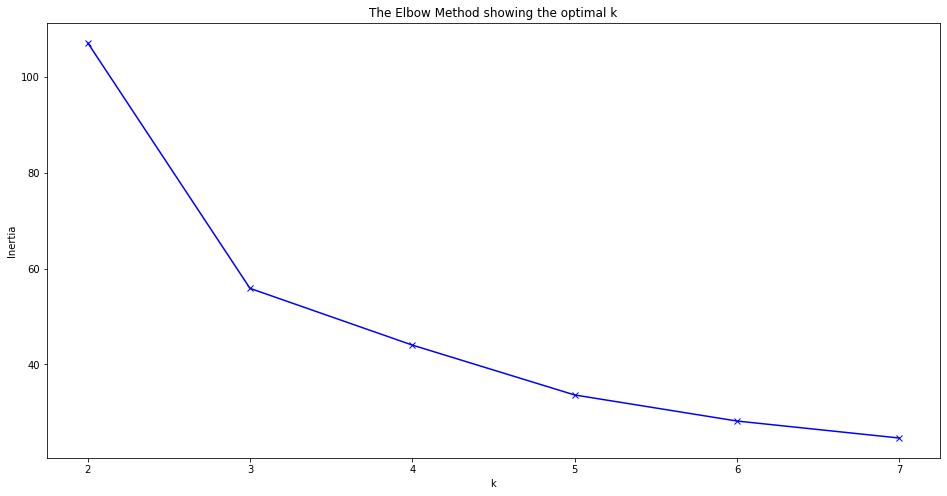

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import cluster

#df_cluster = Data_Cluster

normalized_df=(df_cluster-df_cluster.min())/(df_cluster.max()-df_cluster.min())
x = normalized_df.iloc[:, [0,1,4]].values

distortions = []
K = range(2,8)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k)
    kmeanModel.fit(x)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 3, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(x)

In [ ]:
cluster_label = model.labels_
df_group1_clean['cluster']=cluster_label

df_group1_clean = df_group1_clean[['user_id','Recension (days)', 'count transaction','total_amount','favorite product category','favorite payment method','cluster']]
df_group1_clean.head(3)

,user_id,Recension (days),count transaction,total_amount,favorite product category,favorite payment method,cluster
0,10000,374,2,190000.0,2.0,5.0,2
1,10001,43,4,710000.0,1.0,5.0,0
2,10002,7,7,1510000.0,1.0,5.0,0


In [ ]:
df_group1_clean.groupby("cluster").agg(count = ('user_id', lambda x: x.count()),
                            frequency_mean=('count transaction', lambda x: x.mean()), 
                            frequency_median=('count transaction', lambda x: x.median()),
                            recency_mean=('Recension (days)', lambda x: x.mean()), 
                            recency_median=('Recension (days)', lambda x: x.median()),
                            purchase_mean_thousand =('total_amount', lambda x: x.mean()/1000),
                            purchase_median_thousand=('total_amount', lambda x: x.median()/1000),
                            favorite_product_category =('favorite product category', lambda x: pd.Series.mode(x).iat[0]),
                            favorite_payment_method =('favorite payment method', lambda x: pd.Series.mode(x).iat[0]),
                          )

,count,frequency_mean,frequency_median,recency_mean,recency_median,purchase_mean_thousand,purchase_median_thousand,favorite_product_category,favorite_payment_method
cluster,,,,,,,,,
0,682,4.775660,5.0,74.246334,63.0,2073.589443,810.0,1.0,5.0
1,311,12.302251,12.0,71.327974,51.0,17177.334405,15350.0,7.0,5.0
2,315,4.485714,4.0,309.031746,293.0,2302.888889,830.0,1.0,5.0


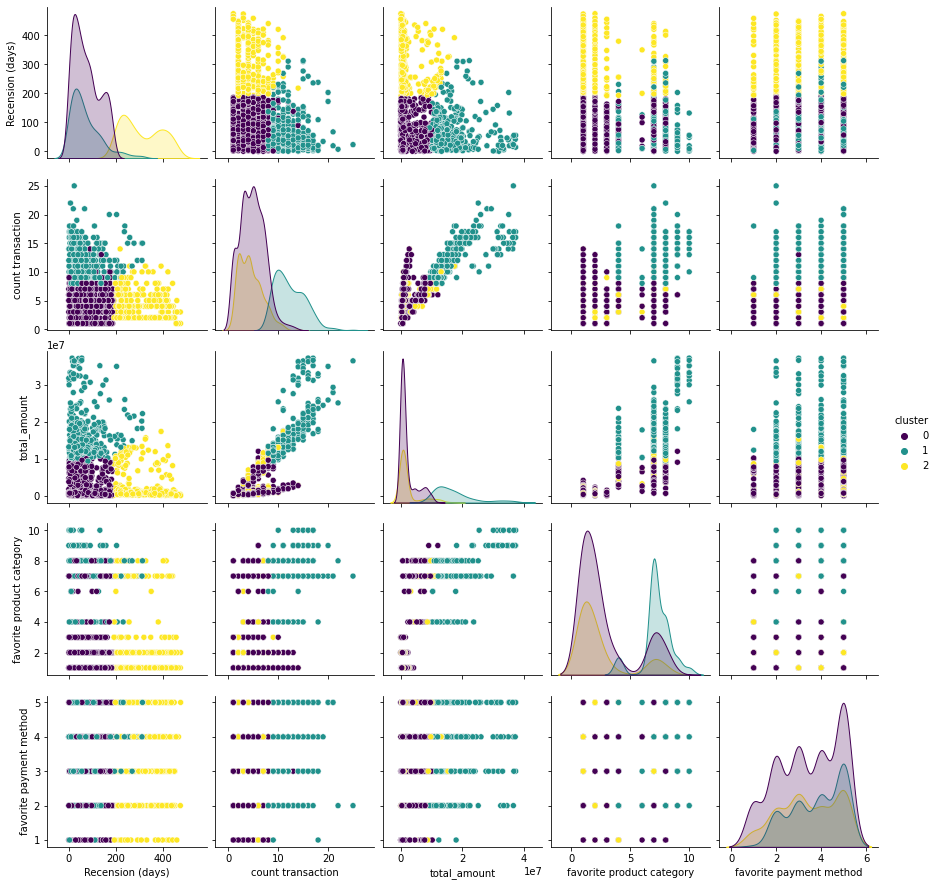

In [ ]:
result_plot = df_group1_clean.loc[:, df_group1_clean.columns!='user_id']
sns.pairplot(result_plot,hue='cluster', palette ="viridis")

### Clustering Outliers

In [ ]:
df_cluster = df_group1_outlier.iloc[:, [1,2,3,4,5]]
df_cluster.head(5)

,count transaction,total_amount,favorite product category,favorite payment method,Recension (days)
0,1,0.0,0.0,0.0,729
1,1,0.0,0.0,0.0,729
2,1,0.0,0.0,0.0,729
3,3,830000.0,1.0,1.0,507
4,1,0.0,0.0,0.0,729


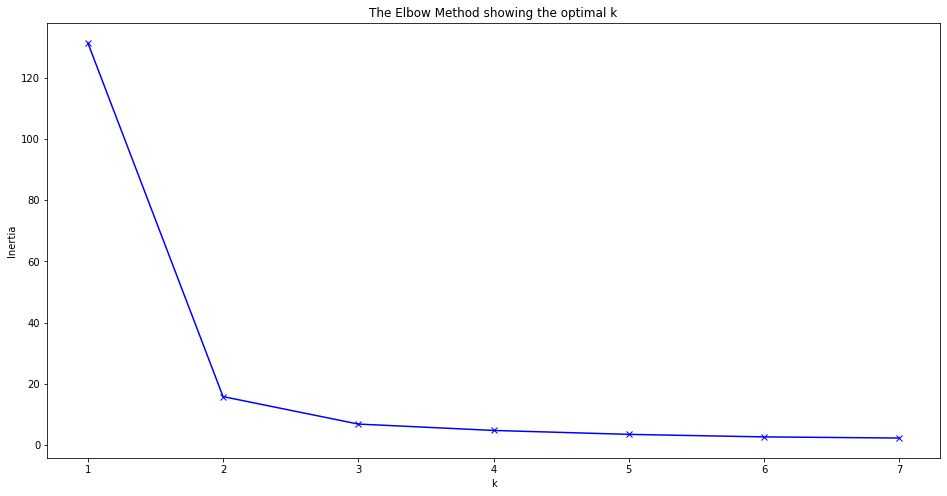

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import cluster

normalized_df=(df_cluster-df_cluster.min())/(df_cluster.max()-df_cluster.min())
x = normalized_df.iloc[:, [0,1,4]].values

distortions = []
K = range(1,8)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k)
    kmeanModel.fit(x)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

from sklearn.cluster import KMeans
model = KMeans(n_clusters = 2, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(x)

In [ ]:
cluster_label = model.labels_
df_group1_outlier['cluster']=cluster_label

df_group1_outlier = df_group1_outlier[['user_id','Recension (days)', 'count transaction','total_amount','favorite product category','favorite payment method','cluster']]
df_group1_outlier.head(3)

,user_id,Recension (days),count transaction,total_amount,favorite product category,favorite payment method,cluster
0,10013,729,1,0.0,0.0,0.0,0
1,10025,729,1,0.0,0.0,0.0,0
2,10027,729,1,0.0,0.0,0.0,0


In [ ]:
df_group1_outlier.groupby("cluster").agg(count = ('user_id', lambda x: x.count()),
                            frequency_mean=('count transaction', lambda x: x.mean()), 
                            frequency_median=('count transaction', lambda x: x.median()),
                            recency_mean=('Recension (days)', lambda x: x.mean()), 
                            recency_median=('Recension (days)', lambda x: x.median()),
                            purchase_mean_thousand =('total_amount', lambda x: x.mean()/1000),
                            purchase_median_thousand=('total_amount', lambda x: x.median()/1000),
                            favorite_product_category =('favorite product category', lambda x: pd.Series.mode(x).iat[0]),
                            favorite_payment_method =('favorite payment method', lambda x: pd.Series.mode(x).iat[0]),
                          )

,count,frequency_mean,frequency_median,recency_mean,recency_median,purchase_mean_thousand,purchase_median_thousand,favorite_product_category,favorite_payment_method
cluster,,,,,,,,,
0,129,1.348837,1.0,685.426357,729.0,213.992248,0.0,0.0,0.0
1,265,27.313208,26.0,49.467925,35.0,63912.433962,59982.8,9.0,5.0


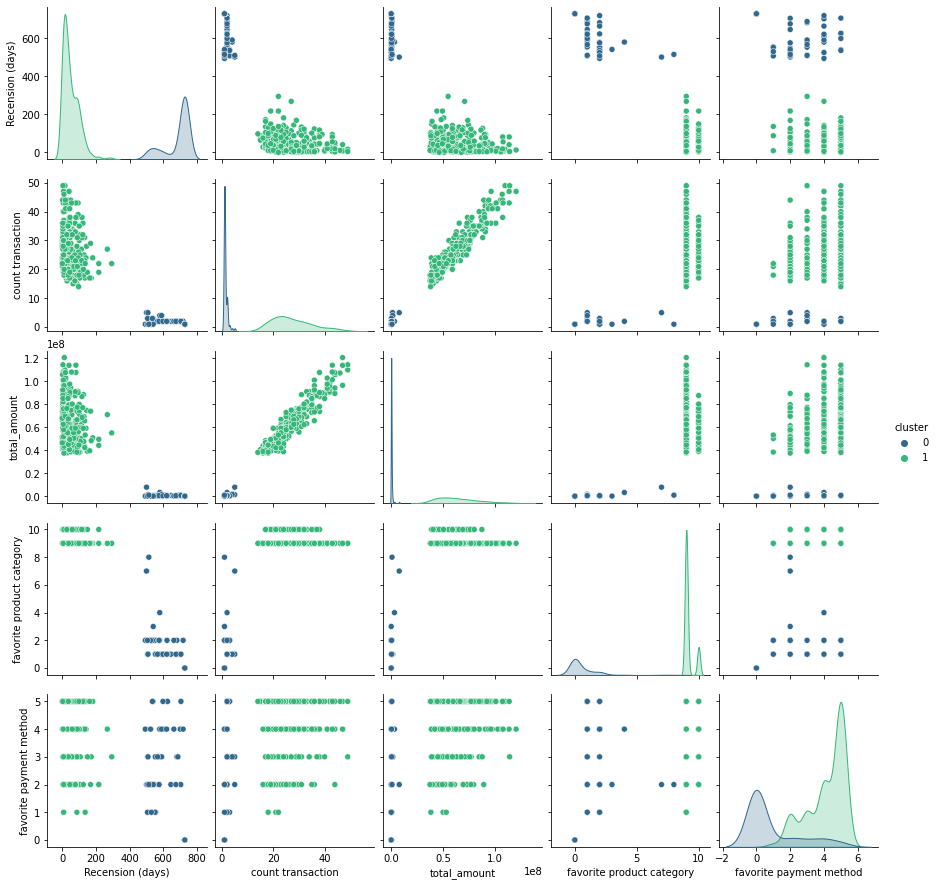

In [ ]:
result_plot = df_group1_outlier.loc[:, df_group1_outlier.columns!='user_id']
sns.pairplot(result_plot,hue='cluster', palette ="viridis")

### Plot Clustering Clean + Clustering Outliers

In [ ]:
df_group1_outlier_new = df_group1_outlier
df_group1_outlier_new['cluster'] = df_group1_outlier['cluster'] + 3

dfs = [df_group1_clean, df_group1_outlier_new]
result = pd.concat(dfs)

result['cluster'] = result['cluster']+1
result = result.reset_index(drop=True)
result.head(5)

,user_id,Recension (days),count transaction,total_amount,favorite product category,favorite payment method,cluster
0,10000,374,2,190000.0,2.0,5.0,3
1,10001,43,4,710000.0,1.0,5.0,1
2,10002,7,7,1510000.0,1.0,5.0,1
3,10003,142,3,280000.0,1.0,5.0,1
4,10004,217,4,1010000.0,1.0,3.0,3


In [ ]:
char_clustering = result.groupby("cluster").agg(count = ('user_id', lambda x: x.count()),
                            frequency_mean=('count transaction', lambda x: x.mean()), 
                            frequency_median=('count transaction', lambda x: x.median()),
                            recency_mean=('Recension (days)', lambda x: x.mean()), 
                            recency_median=('Recension (days)', lambda x: x.median()),
                            purchase_mean_thousand =('total_amount', lambda x: x.mean()/1000),
                            purchase_median_thousand=('total_amount', lambda x: x.median()/1000),
                            favorite_product_category =('favorite product category', lambda x: pd.Series.mode(x).iat[0]),
                            favorite_payment_method =('favorite payment method', lambda x: pd.Series.mode(x).iat[0]),
                          )
char_clustering.sort_values(['frequency_mean'], ascending= False)

# Tingkatan
# Cluster fossil, eggs, little chick, chicken, swan, golden swan

# bronze, silver, gold, platinum, diamond, palladium

# lost, concerning, general customers, comfortable customers, loyal customers, VIP customers


# Fossil : possibly have uninstalled the app, just trying out the app, like to buy product category 1 and 2
# Egg : Possibly haven't opened the app for a long time,
# little chick : users with hope, just recently bought but not a big spender, once in a while buyer
# Chicken : customers that starts to be loyal and spend a lot of money
# swan : The backbone our e-commerce the loyal and like to buy electronic
# Golden swan : Big spender and have been comfortable with their purchase, mostly bought electronic

,count,frequency_mean,frequency_median,recency_mean,recency_median,purchase_mean_thousand,purchase_median_thousand,favorite_product_category,favorite_payment_method
cluster,,,,,,,,,
5,265,27.313208,26.0,49.467925,35.0,63912.433962,59982.8,9.0,5.0
2,311,12.302251,12.0,71.327974,51.0,17177.334405,15350.0,7.0,5.0
1,682,4.775660,5.0,74.246334,63.0,2073.589443,810.0,1.0,5.0
3,315,4.485714,4.0,309.031746,293.0,2302.888889,830.0,1.0,5.0
4,129,1.348837,1.0,685.426357,729.0,213.992248,0.0,0.0,0.0


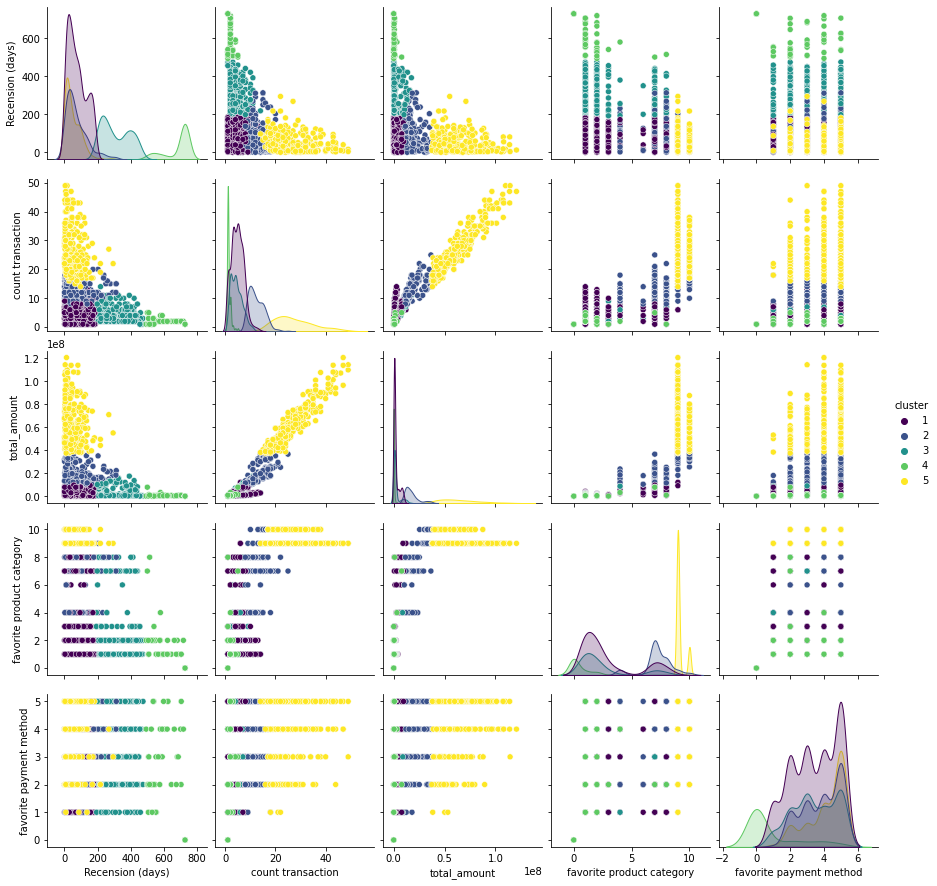

In [ ]:
result_plot = result.loc[:, result.columns!='user_id']
sns.pairplot(result_plot,hue='cluster', palette ="viridis")

### Clustering Semua

In [ ]:
df_cluster = df_group1.iloc[:, [1,2,3,4,5]]
df_cluster.head(5)

,count transaction,total_amount,favorite product category,favorite payment method,Recension (days)
0,2,190000.0,2.0,5.0,374
1,4,710000.0,1.0,5.0,43
2,7,1510000.0,1.0,5.0,7
3,3,280000.0,1.0,5.0,142
4,4,1010000.0,1.0,3.0,217


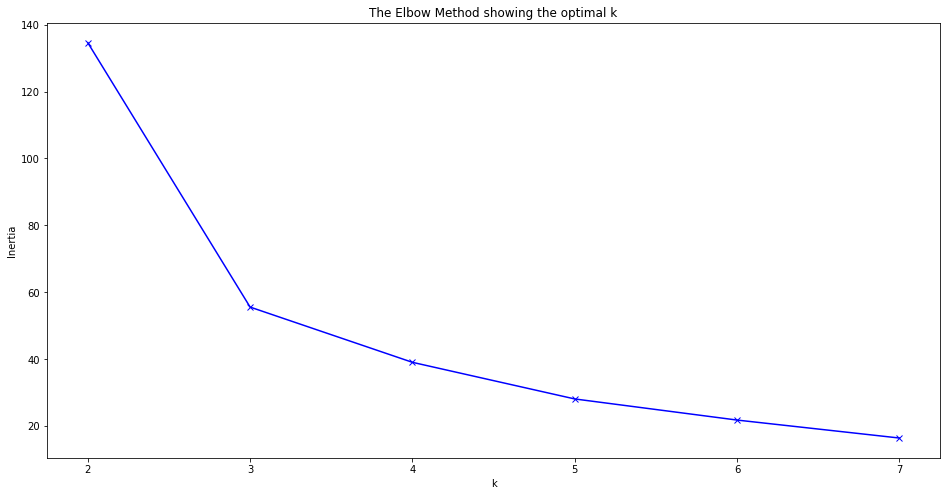

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import cluster

normalized_df=(df_cluster-df_cluster.min())/(df_cluster.max()-df_cluster.min())
x = normalized_df.iloc[:, [0,1,4]].values
#df_cluster = Data_Cluster

distortions = []
K = range(2,8)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k)
    kmeanModel.fit(x)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

from sklearn.cluster import KMeans
model = KMeans(n_clusters = 3, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(x)

In [ ]:
cluster_label = model.labels_
df_group1['cluster']=cluster_label

df_group1 = df_group1[['user_id','Recension (days)', 'count transaction','total_amount','favorite product category','favorite payment method','cluster']]
df_group1.head(3)

,user_id,Recension (days),count transaction,total_amount,favorite product category,favorite payment method,cluster
0,10000,374,2,190000.0,2.0,5.0,2
1,10001,43,4,710000.0,1.0,5.0,1
2,10002,7,7,1510000.0,1.0,5.0,1


In [ ]:
df_group1.to_csv("Hasil clustering.csv")

In [ ]:
df_char = df_group1.groupby("cluster").agg(count = ('user_id', lambda x: x.count()),
                            frequency_mean=('count transaction', lambda x: x.mean()), 
                            frequency_median=('count transaction', lambda x: x.median()),
                            recency_mean=('Recension (days)', lambda x: x.mean()), 
                            recency_median=('Recension (days)', lambda x: x.median()),
                            purchase_mean_thousand =('total_amount', lambda x: x.mean()/1000),
                            purchase_median_thousand=('total_amount', lambda x: x.median()/1000),
                            favorite_product_category =('favorite product category', lambda x: pd.Series.mode(x).iat[0]),
                            favorite_payment_method =('favorite payment method', lambda x: pd.Series.mode(x).iat[0]),
                          )

In [ ]:
df_char.to_csv("Karakteristik Cluster.csv")
df_char

,count,frequency_mean,frequency_median,recency_mean,recency_median,purchase_mean_thousand,purchase_median_thousand,favorite_product_category,favorite_payment_method
cluster,,,,,,,,,
0,277,26.960289,25.0,48.996390,34.0,62594.197834,59246.0,9.0,5.0
1,1163,6.674979,6.0,100.487532,76.0,5892.425795,1400.0,1.0,5.0
2,262,2.583969,2.0,539.137405,470.0,972.003817,230.0,0.0,0.0


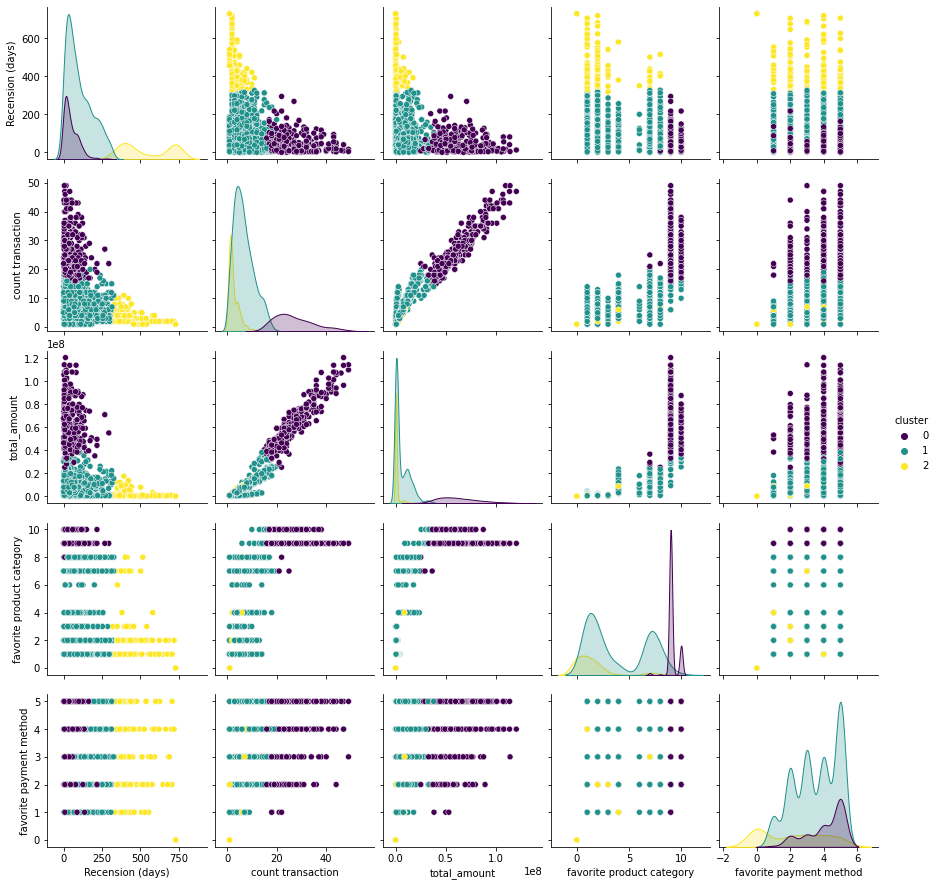

In [ ]:
result_plot = df_group1.loc[:, df_group1.columns!='user_id']
sns.pairplot(result_plot,hue='cluster', palette ="viridis")

### Cluster 1 dibagi dua

In [ ]:
Clustered_chicken = df_group1[(df_group1['cluster']==1)]
Clustered_chicken.head(5)

,user_id,Recension (days),count transaction,total_amount,favorite product category,favorite payment method,cluster
1,10001,43,4,710000.0,1.0,5.0,1
2,10002,7,7,1510000.0,1.0,5.0,1
3,10003,142,3,280000.0,1.0,5.0,1
4,10004,217,4,1010000.0,1.0,3.0,1
5,10005,77,7,785000.0,2.0,3.0,1


In [ ]:
df_cluster = Clustered_chicken.iloc[:, [1,2,3,4,5]]

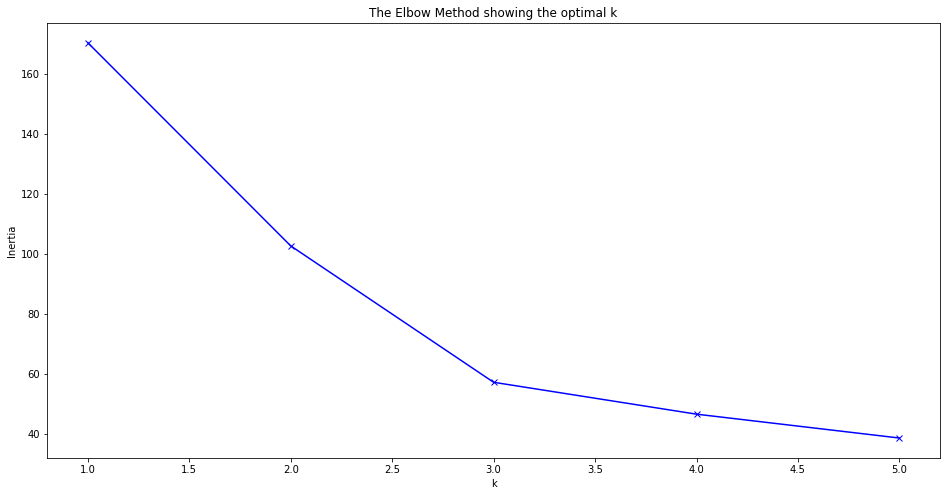

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import cluster

normalized_df=(df_cluster-df_cluster.min())/(df_cluster.max()-df_cluster.min())
x = normalized_df.iloc[:, [0,1,2]].values

distortions = []
K = range(1,6)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k)
    kmeanModel.fit(x)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 3, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(x)

In [ ]:
cluster_label = model.labels_
Clustered_chicken['cluster']=cluster_label
Clustered_chicken['cluster'] = Clustered_chicken['cluster']+3
Clustered_chicken

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,user_id,Recension (days),count transaction,total_amount,favorite product category,favorite payment method,cluster
1,10001,43,4,710000.0,1.0,5.0,3
2,10002,7,7,1510000.0,1.0,5.0,3
3,10003,142,3,280000.0,1.0,5.0,5
4,10004,217,4,1010000.0,1.0,3.0,5
5,10005,77,7,785000.0,2.0,3.0,3
...,...,...,...,...,...,...,...
1540,20839,137,8,11500000.0,8.0,2.0,4
1541,20840,68,7,7770000.0,7.0,1.0,3
1600,20899,35,16,32561000.0,9.0,5.0,4
1641,20940,21,16,31678000.0,9.0,3.0,4


In [ ]:
df_char_chicken = Clustered_chicken.groupby("cluster").agg(count = ('user_id', lambda x: x.count()),
                            frequency_mean=('count transaction', lambda x: x.mean()), 
                            frequency_median=('count transaction', lambda x: x.median()),
                            recency_mean=('Recension (days)', lambda x: x.mean()), 
                            recency_median=('Recension (days)', lambda x: x.median()),
                            purchase_mean_thousand =('total_amount', lambda x: x.mean()/1000),
                            purchase_median_thousand=('total_amount', lambda x: x.median()/1000),
                            favorite_product_category =('favorite product category', lambda x: pd.Series.mode(x).iat[0]),
                            favorite_payment_method =('favorite payment method', lambda x: pd.Series.mode(x).iat[0]),
                          )
df_char_chicken

,count,frequency_mean,frequency_median,recency_mean,recency_median,purchase_mean_thousand,purchase_median_thousand,favorite_product_category,favorite_payment_method
cluster,,,,,,,,,
3,538,4.687732,5.0,52.641264,46.5,2042.477695,787.5,1.0,5.0
4,295,12.074576,12.0,65.077966,51.0,16208.858305,15050.0,7.0,5.0
5,330,5.087879,5.0,210.145455,207.0,2946.742424,970.0,1.0,5.0


### Penggabungan Cluster pisahan chicken sama yang lain

In [ ]:
Clustered_non_chicken = df_group1[(df_group1['cluster']!=1)]
Clustered_non_chicken.head(5)

,user_id,Recension (days),count transaction,total_amount,favorite product category,favorite payment method,cluster
0,10000,374,2,190000.0,2.0,5.0,2
6,10006,319,4,160000.0,3.0,4.0,2
13,10013,729,1,0.0,0.0,0.0,2
19,10019,435,2,170000.0,2.0,5.0,2
20,10020,337,4,800000.0,2.0,4.0,2


In [ ]:
cluster_newest = Clustered_non_chicken.append(Clustered_chicken, ignore_index = True)
cluster_newest = cluster_newest.reset_index(drop=True)
cluster_newest

,user_id,Recension (days),count transaction,total_amount,favorite product category,favorite payment method,cluster
0,10000,374,2,190000.0,2.0,5.0,2
1,10006,319,4,160000.0,3.0,4.0,2
2,10013,729,1,0.0,0.0,0.0,2
3,10019,435,2,170000.0,2.0,5.0,2
4,10020,337,4,800000.0,2.0,4.0,2
...,...,...,...,...,...,...,...
1697,20839,137,8,11500000.0,8.0,2.0,4
1698,20840,68,7,7770000.0,7.0,1.0,3
1699,20899,35,16,32561000.0,9.0,5.0,4
1700,20940,21,16,31678000.0,9.0,3.0,4


In [ ]:
df_char_newest = cluster_newest.groupby("cluster").agg(count = ('user_id', lambda x: x.count()),
                            frequency_mean=('count transaction', lambda x: x.mean()), 
                            frequency_median=('count transaction', lambda x: x.median()),
                            recency_mean=('Recension (days)', lambda x: x.mean()), 
                            recency_median=('Recension (days)', lambda x: x.median()),
                            purchase_mean_thousand =('total_amount', lambda x: x.mean()/1000),
                            purchase_median_thousand=('total_amount', lambda x: x.median()/1000),
                            favorite_product_category =('favorite product category', lambda x: pd.Series.mode(x).iat[0]),
                            favorite_payment_method =('favorite payment method', lambda x: pd.Series.mode(x).iat[0]),
                          )
df_char_newest

,count,frequency_mean,frequency_median,recency_mean,recency_median,purchase_mean_thousand,purchase_median_thousand,favorite_product_category,favorite_payment_method
cluster,,,,,,,,,
0,277,26.960289,25.0,48.996390,34.0,62594.197834,59246.0,9.0,5.0
2,262,2.583969,2.0,539.137405,470.0,972.003817,230.0,0.0,0.0
3,538,4.687732,5.0,52.641264,46.5,2042.477695,787.5,1.0,5.0
4,295,12.074576,12.0,65.077966,51.0,16208.858305,15050.0,7.0,5.0
5,330,5.087879,5.0,210.145455,207.0,2946.742424,970.0,1.0,5.0


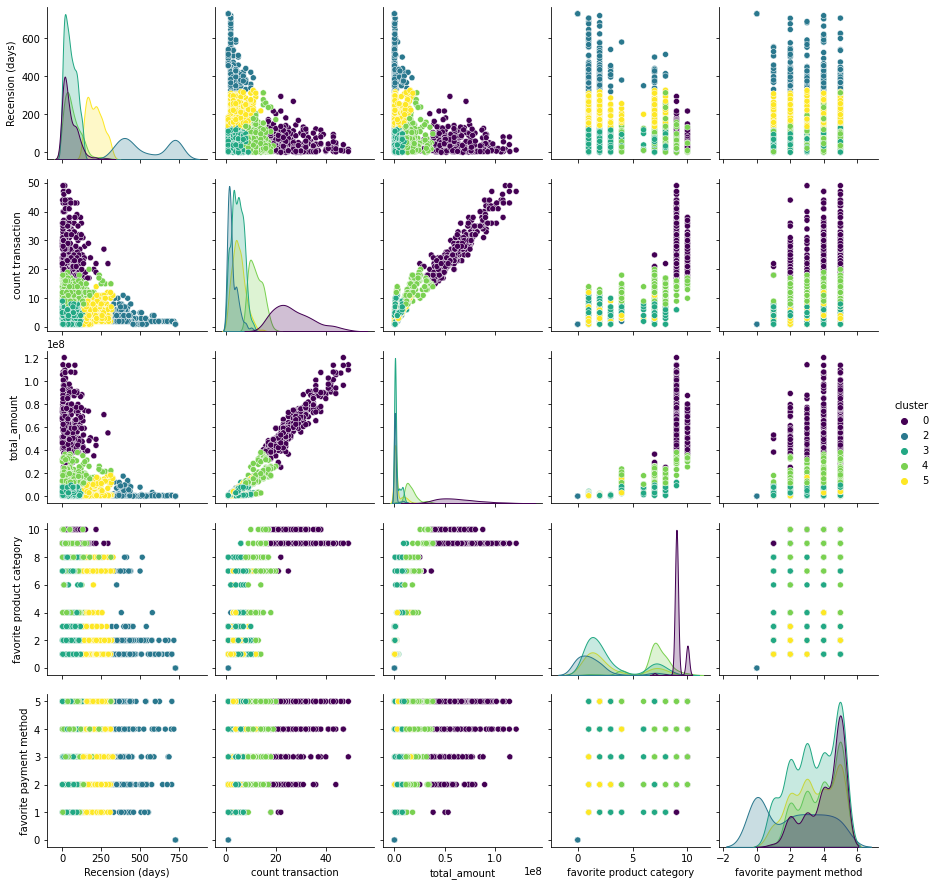

In [ ]:
result_cluster_newest = cluster_newest.loc[:, cluster_newest.columns!='user_id']
sns.pairplot(result_cluster_newest,hue='cluster', palette ="viridis")

### Clustering Semua K=4

In [ ]:
df_cluster = df_group1.iloc[:, [1,2,3,4,5]]
df_cluster

,Recension (days),count transaction,total_amount,favorite product category,favorite payment method
0,374,2,190000.0,2.0,5.0
1,43,4,710000.0,1.0,5.0
2,7,7,1510000.0,1.0,5.0
3,142,3,280000.0,1.0,5.0
4,217,4,1010000.0,1.0,3.0
...,...,...,...,...,...
1697,59,32,80238000.0,10.0,4.0
1698,99,18,44464000.0,9.0,5.0
1699,3,36,92520000.0,9.0,5.0
1700,136,22,53246600.0,9.0,1.0


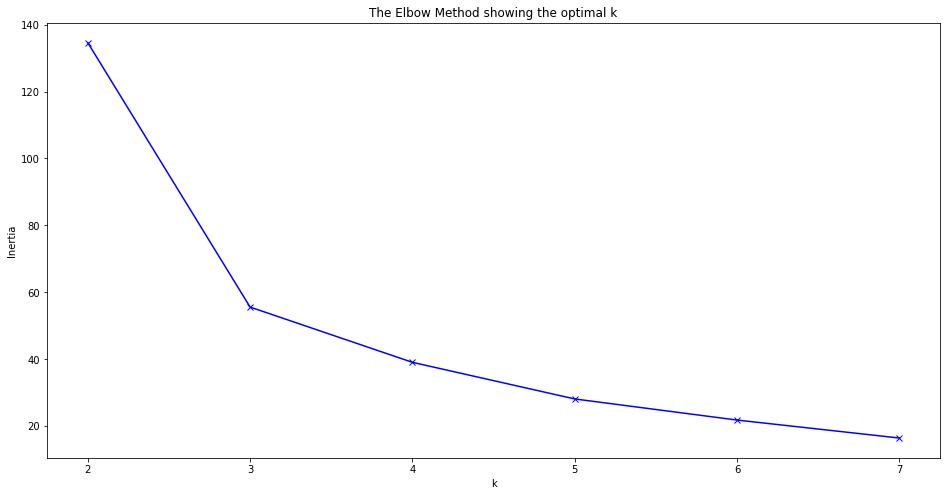

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import cluster

normalized_df=(df_cluster-df_cluster.min())/(df_cluster.max()-df_cluster.min())
x = normalized_df.iloc[:, [0,1,2]].values
#df_cluster = Data_Cluster

distortions = []
K = range(2,8)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k)
    kmeanModel.fit(x)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

from sklearn.cluster import KMeans
model = KMeans(n_clusters = 4, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(x)

In [ ]:
cluster_label = model.labels_
df_group1['cluster']=cluster_label

df_group1 = df_group1[['user_id','Recension (days)', 'count transaction','total_amount','favorite product category','favorite payment method','cluster']]
df_group1

,user_id,Recension (days),count transaction,total_amount,favorite product category,favorite payment method,cluster
0,10000,374,2,190000.0,2.0,5.0,3
1,10001,43,4,710000.0,1.0,5.0,0
2,10002,7,7,1510000.0,1.0,5.0,0
3,10003,142,3,280000.0,1.0,5.0,0
4,10004,217,4,1010000.0,1.0,3.0,3
...,...,...,...,...,...,...,...
1697,20996,59,32,80238000.0,10.0,4.0,2
1698,20997,99,18,44464000.0,9.0,5.0,2
1699,20998,3,36,92520000.0,9.0,5.0,2
1700,20999,136,22,53246600.0,9.0,1.0,2


In [ ]:
df_group1.to_csv("Final Clustering Result.csv")

In [ ]:
df_char = df_group1.groupby("cluster").agg(count = ('user_id', lambda x: x.count()),
                            frequency_mean=('count transaction', lambda x: x.mean()), 
                            frequency_median=('count transaction', lambda x: x.median()),
                            recency_mean=('Recension (days)', lambda x: x.mean()), 
                            recency_median=('Recension (days)', lambda x: x.median()),
                            purchase_mean_thousand =('total_amount', lambda x: x.mean()/1000),
                            purchase_median_thousand=('total_amount', lambda x: x.median()/1000),
                            favorite_product_category =('favorite product category', lambda x: pd.Series.mode(x).iat[0]),
                            favorite_payment_method =('favorite payment method', lambda x: pd.Series.mode(x).iat[0]),
                          )

In [ ]:
df_char.to_csv("Final Clustering Result Characteristics.csv")
df_char

,count,frequency_mean,frequency_median,recency_mean,recency_median,purchase_mean_thousand,purchase_median_thousand,favorite_product_category,favorite_payment_method
cluster,,,,,,,,,
0,939,6.972311,6.0,67.288605,56.0,6439.934611,1690.0,1.0,5.0
1,129,1.348837,1.0,685.426357,729.0,213.992248,0.0,0.0,0.0
2,275,27.043636,25.0,48.945455,34.0,62776.274182,59330.0,9.0,5.0
3,359,4.874652,4.0,297.016713,271.0,3086.267409,850.0,1.0,5.0


In [ ]:
a = 939	*6439.934611
b = 129	*213.992248	
c = 275*62776.274182	
d = 359	*3086.267409	

e = a+b+c+d

In [ ]:
d*100/e

4.532288500119339

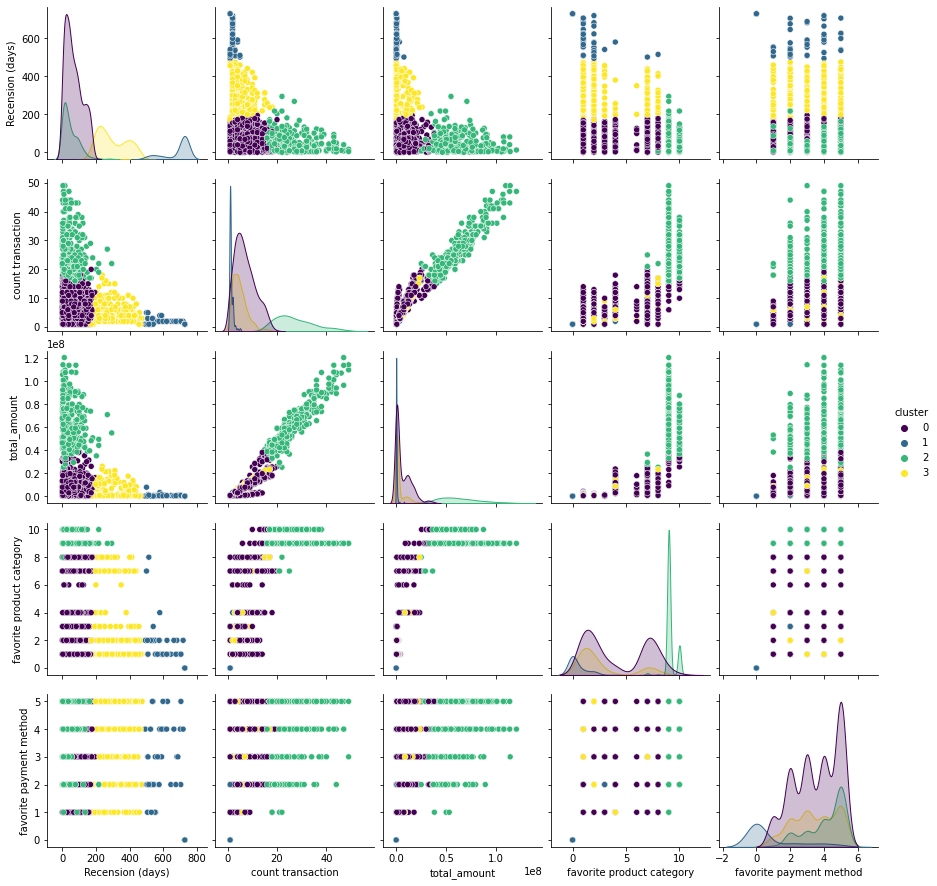

In [ ]:
result_plot = df_group1.loc[:, df_group1.columns!='user_id']
sns.pairplot(result_plot,hue='cluster', palette ="viridis")

### Explore Cluster

In [ ]:
# result is clusters result to outliers and clean data
# char_clustering is the characteristics for outliers + clean data combined

# df_group1 is for all clusters
# df_char is the characteristics of all

df_group1

,user_id,Recension (days),count transaction,total_amount,favorite product category,favorite payment method,cluster
0,10000,374,2,190000.0,2.0,5.0,3
1,10001,43,4,710000.0,1.0,5.0,0
2,10002,7,7,1510000.0,1.0,5.0,0
3,10003,142,3,280000.0,1.0,5.0,0
4,10004,217,4,1010000.0,1.0,3.0,3
...,...,...,...,...,...,...,...
1697,20996,59,32,80238000.0,10.0,4.0,2
1698,20997,99,18,44464000.0,9.0,5.0,2
1699,20998,3,36,92520000.0,9.0,5.0,2
1700,20999,136,22,53246600.0,9.0,1.0,2


In [ ]:
conversion_rate_df = pd.merge(df_group1[['user_id', 'cluster']], Event, how = "left",on="user_id")

In [ ]:
conversion_rate_df

,user_id,cluster,event_id,event_name,timestamp_event,favorite_flag
0,10000,3,157176.0,checkout,2020-12-21 21:32:01,0.0
1,10000,3,157177.0,completed,2020-12-21 21:32:08,0.0
2,10000,3,157167.0,view cart,2020-12-21 21:29:23,0.0
3,10000,3,215680.0,view cart,2021-12-14 12:49:37,1.0
4,10000,3,157165.0,add to cart,2020-12-21 21:29:00,0.0
...,...,...,...,...,...,...
118890,21000,2,211250.0,choose delivery services,2021-11-18 17:24:09,0.0
118891,21000,2,212282.0,choose delivery services,2021-11-24 07:41:35,1.0
118892,21000,2,213112.0,choose delivery services,2021-11-28 10:47:08,0.0
118893,21000,2,217681.0,choose delivery services,2021-12-24 13:19:29,0.0


In [ ]:
conversion_rate_df.to_csv('for_conversion_rate.csv', index=False)

In [ ]:
A = conversion_rate_df.groupby('cluster').event_name.value_counts()

In [ ]:
New = A.to_frame()
New = New["event_name"]

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

New

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  after removing the cwd from sys.path.


cluster  event_name              
0        product view                7527
         add to cart                 6339
         view cart                   6219
         using promo code            5776
         choose address              5369
         choose delivery services    5126
         change payment method       4939
         checkout                    4496
         completed                   4001
         cancelled                   495 
         using promo code error      154 
         checkout error              85  
         add to cart error           68  
         view cart error             65  
1        product view                259 
         add to cart                 200 
         view cart                   189 
         using promo code            149 
         choose address              115 
         choose delivery services    100 
         change payment method       83  
         checkout                    49  
         completed                   49  


In [ ]:
pd. reset_option("all") 

As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.

: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



/usr/local/lib/python3.7/dist-packages/pandas/_config/config.py:630: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.
  warnings.warn(d.msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/pandas/_config/config.py:630: FutureWarning: 
: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.

  warnings.warn(d.msg, FutureWarning)
